In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv")
df.iloc[:, 1:59]
df.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

## PRE-PROCESS THE DATA

In [3]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df['label'])
y_true = df['label']
y = le.transform(df["label"])
X = df.iloc[:, 1:59] 

scaled = preprocessing.MinMaxScaler().fit_transform(X)
X = pd.DataFrame(scaled, columns = X.columns)

## Split into Training and Testing 

In [4]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y)
print(f"The size of training data is: {train_x.size}")
print(f"The size of testing data is: {test_x.size}")

The size of training data is: 434536
The size of testing data is: 144884


# Split for cross validation 

In [5]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=10)

# Try Supervised Machine Learning Algorithms

In [6]:
from sklearn.model_selection import GridSearchCV

def hyperparameter_search(parameters, classifier, train_x, train_y):
    grid = GridSearchCV(estimator=classifier, param_grid=parameters, cv=kfold, scoring='accuracy')
    grid.fit(train_x, train_y)
    return grid

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

hp = [{'n_neighbors': [4, 6, 8, 10]}]

knn = hyperparameter_search(hp, KNeighborsClassifier(), train_x, train_y)
print(knn.best_score_)
print(knn.best_estimator_)
print(knn.best_params_)

0.8813387830427228
KNeighborsClassifier(n_neighbors=4)
{'n_neighbors': 4}


In [8]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

hp = [{'max_depth': [None, 5, 10, 15, 20]}]
dt = hyperparameter_search(hp, DecisionTreeClassifier(), train_x, train_y)

print(dt.best_score_)
print(dt.best_estimator_)
print(dt.best_params_)

0.6257338448151015
DecisionTreeClassifier()
{'max_depth': None}


In [9]:
from sklearn.ensemble import RandomForestClassifier

hp = [{'n_estimators': [10,100, 1000], 'max_depth': [None]}]
rfc = hyperparameter_search(hp, RandomForestClassifier(), train_x, train_y)

print(rfc.best_score_)
print(rfc.best_estimator_)
print(rfc.best_params_)

0.8586490682261696
RandomForestClassifier(n_estimators=1000)
{'max_depth': None, 'n_estimators': 1000}


In [10]:
from sklearn.svm import SVC

hp = [{'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 'decision_function_shape': ['ovo']}]
svc = hyperparameter_search(hp, SVC(), train_x, train_y)

print(svc.best_score_)
print(svc.best_estimator_)
print(svc.best_params_)

0.7863046214165028
SVC(decision_function_shape='ovo', kernel='poly')
{'decision_function_shape': 'ovo', 'kernel': 'poly'}


In [11]:
from sklearn.linear_model import LogisticRegression

hp = [{'solver' : ['liblinear']}]
logreg = hyperparameter_search(hp, LogisticRegression(), train_x, train_y)

print(logreg.best_score_)
print(logreg.best_estimator_)
print(logreg.best_params_)

0.6651071341731158
LogisticRegression(solver='liblinear')
{'solver': 'liblinear'}


In [12]:
from sklearn.neural_network import MLPClassifier

hp = [{'alpha' : [1e-3, 1e-5, 1e-8], 'random_state': [1], 'hidden_layer_sizes': [(100,10)], 'max_iter': [500]}]
nn = hyperparameter_search(hp, MLPClassifier(), train_x, train_y)

print(nn.best_score_)
print(nn.best_estimator_)
print(nn.best_params_)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.7794934941051043
MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 10), max_iter=500,
              random_state=1)
{'alpha': 0.001, 'hidden_layer_sizes': (100, 10), 'max_iter': 500, 'random_state': 1}


## ANALYSIS

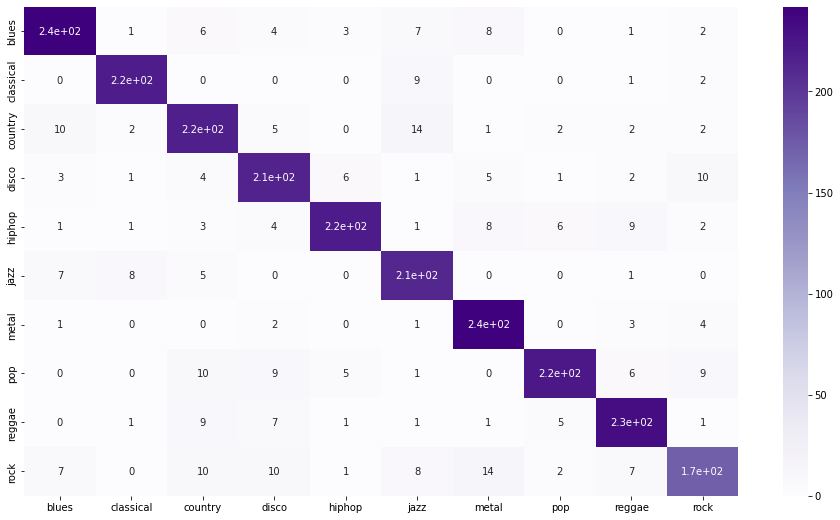

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
preds = rfc.predict(test_x)
confusion_matr = confusion_matrix(le.inverse_transform(test_y), le.inverse_transform(preds))
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Purples", annot=True, 
            xticklabels = le.classes_,
           yticklabels= le.classes_);

In [14]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(estimator=rfc, random_state=1)
perm.fit(test_x, test_y)

eli5.show_weights(estimator=perm, feature_names = test_x.columns.tolist())

Weight,Feature
0.0275 ± 0.0065,perceptr_var
0.0271 ± 0.0047,mfcc4_mean
0.0211 ± 0.0070,chroma_stft_mean
0.0203 ± 0.0034,rms_var
0.0187 ± 0.0040,mfcc9_mean
0.0163 ± 0.0041,mfcc6_mean
0.0157 ± 0.0035,perceptr_mean
0.0150 ± 0.0019,harmony_mean
0.0118 ± 0.0031,harmony_var
0.0112 ± 0.0017,mfcc7_mean


## UNsupervised Learning

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit_predict(train_x)
kmeans

array([5, 1, 2, ..., 2, 5, 4], dtype=int32)

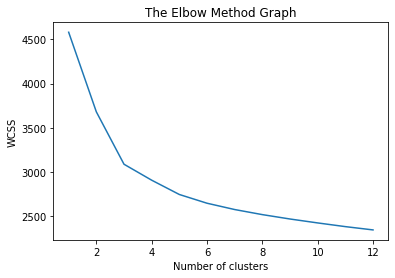

In [16]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,13): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(train_x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,13),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
c_matrix = []
for x in range(9):
    filtered_label2 = train_x[kmeans == x]
    true_label = train_y[kmeans == x]
    arr = []
    for y in range(9):
        correct_label = true_label[np.where(true_label == y)]
        arr.append(len(correct_label)/len(true_label))
    c_matrix.append(arr)

print(c_matrix)
plt.figure(figsize = (16, 9))
sns.heatmap(c_matrix, cmap="Greens", annot=True, 
            xticklabels = le.classes_,
           yticklabels= [y for y in range(9)]);

KeyError: False